# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.paths import DATA_DIR

DATA_FILE_PATH = DATA_DIR / "raw/penguins.csv"

ModuleNotFoundError: No module named 'src'

In [2]:
df = pd.read_csv(DATA_FILE_PATH)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Understanding the Palmer Penguins Dataset

The Palmer Penguins dataset offers a rich, multi-dimensional perspective on the physical characteristics of penguins from the Palmer Archipelago in Antarctica. To better understand the ecological dynamics of these birds, we'll delve into the key variables provided in the dataset.

1. `species`: indicates the species of the penguin. The dataset includes three penguin species: Adelie, Chinstrap, and Gentoo.

2. `island`: specifies the island in the Palmer Archipelago where the penguin was observed. The penguins were observed on three islands: Biscoe, Dream, and Torgersen.

3. : `culmen_length_mm`: provides insights into the feeding habits and ecological niches of the penguins.

4. `culmen_depth_mm`: quantifies the depth of the penguin's beak. 

5. `flipper_length_mm`: a key factor in determining a penguin's swimming ability and agility in water.

6. `body_mass_g`: a health and fitness indicator, influencing breeding success and survival rates.

7. `sex`: identifies the sex of the penguin - 'MALE' or 'FEMALE'.


**[insert image here]**


get a concise summary of a DataFrame. It provides information about:
The number of entries and columns
The names and types of columns
The number of non-null values in each column
The amount of memory used
Use info() when you need an overview of the DataFrame, including data types and missing values.

In [3]:
# Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Summary statistics for the features
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


let's get the summary statistics for the features in our dataset.

In [6]:
# get value counts for categorical features
for col in df.select_dtypes("object"):
    col_distribution = df[col].value_counts()
    print(f"Feature:\n{col_distribution} \n")

Feature:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64 

Feature:
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64 

Feature:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64 



The distribution of the categories in our data are:

The distribution of categories in our dataset reveals key insights:

-   `species`:: The dataset includes 3 species, with Adelie having the highest count (152), followed by Gentoo (124) and Chinstrap (68).
-   `island`: The penguins are distributed across 3 islands, with the majority on Biscoe (168), then Dream (124), and fewer on Torgersen (52).
-   `sex`: The gender distribution is nearly balanced, with 168 males, 165 females, and one penguin classified ambiguously as (`.`).

We'll replace the ambiguous value in the `sex` column with a null value to maintain data consistency.

In [8]:
df["sex"] = df["sex"].replace(".", np.nan)

print(f'Feature:\n{df["sex"].value_counts()} \n')

Feature:
sex
MALE      168
FEMALE    165
Name: count, dtype: int64 



In [9]:
# Calculate the sum of missing values for each column
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Replace missing values with the most frequent value in the column

In [10]:
from sklearn.impute import SimpleImputer

# Impute missing values with the most frequent value
imputer = SimpleImputer(strategy="most_frequent")
df.iloc[:] = imputer.fit_transform(df)
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

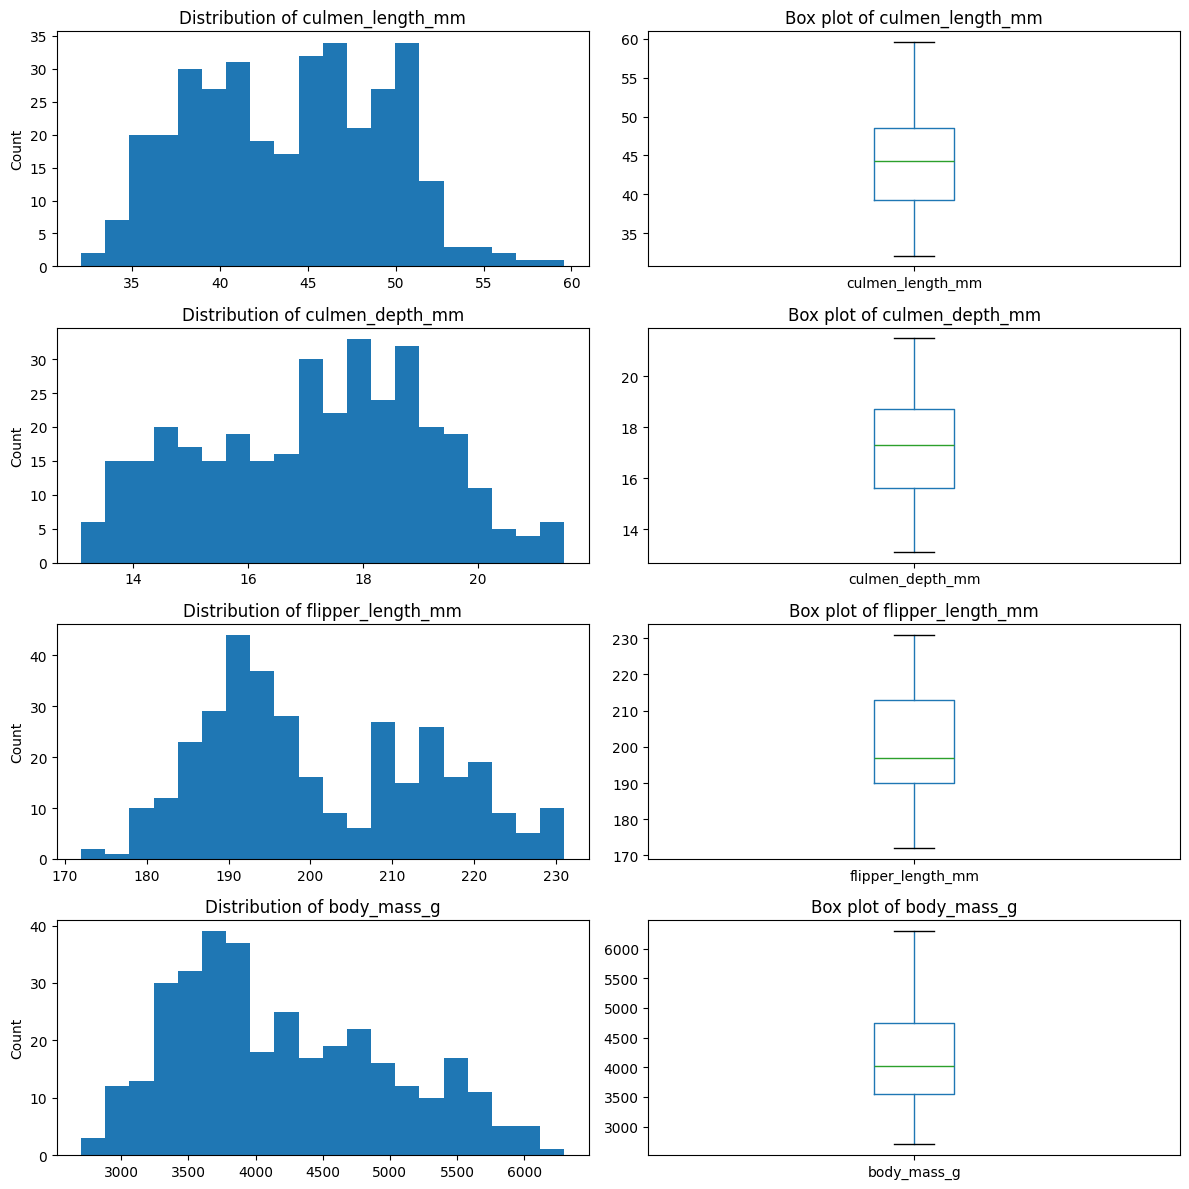

In [11]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
num_cols = len(numerical_cols)

# Creating subplots
fig, axs = plt.subplots(num_cols, 2, figsize=(12, num_cols * 3))

for i, col in enumerate(numerical_cols):
    # Histogram for distribution
    axs[i, 0].hist(df[col].dropna(), bins=20)
    axs[i, 0].set_ylabel("Count")
    axs[i, 0].set_title(f"Distribution of {col}")

    # Boxplot for outliers
    df.boxplot(column=col, ax=axs[i, 1], showfliers=False)
    axs[i, 1].set_title(f"Box plot of {col}")
    axs[i, 1].grid(False)  # Disable grid lines

plt.tight_layout()
plt.show()

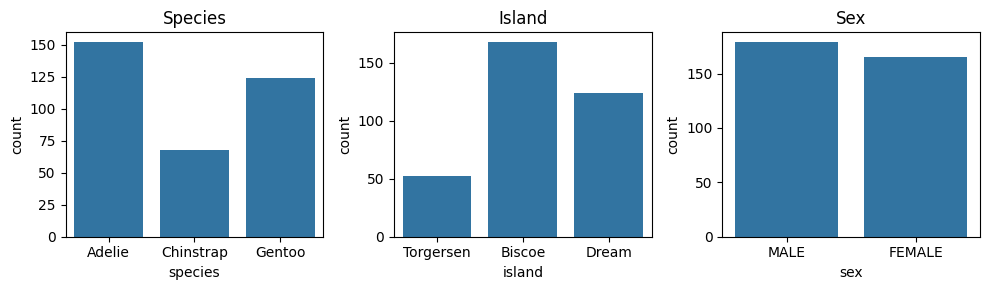

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))

sns.countplot(data=df, x="species", ax=axs[0])
axs[0].set_title("Species")

sns.countplot(data=df, x="island", ax=axs[1])
axs[1].set_title("Island")

sns.countplot(data=df, x="sex", ax=axs[2])
axs[2].set_title("Sex")

plt.tight_layout()
plt.show()

In [ ]:
# Analyze the distribution and noise in numerical columns
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    print(f"\nColumn: {col}")
    print("Distribution:", df[col].describe())
    print("Potential outliers:", df[col].plot(kind="box"))